**Homework 6**

Name:

NetID:

**1.) Load and display the MNIST data**

In this homework you'll be applying most of the skills you've learned so far on the MNIST dataset. The MNIST dataset is a collection of handwritten digits, and is often used as a benchmark for machine learning algorithms. For Question 1, you'll load the data and print out what the data looks like.

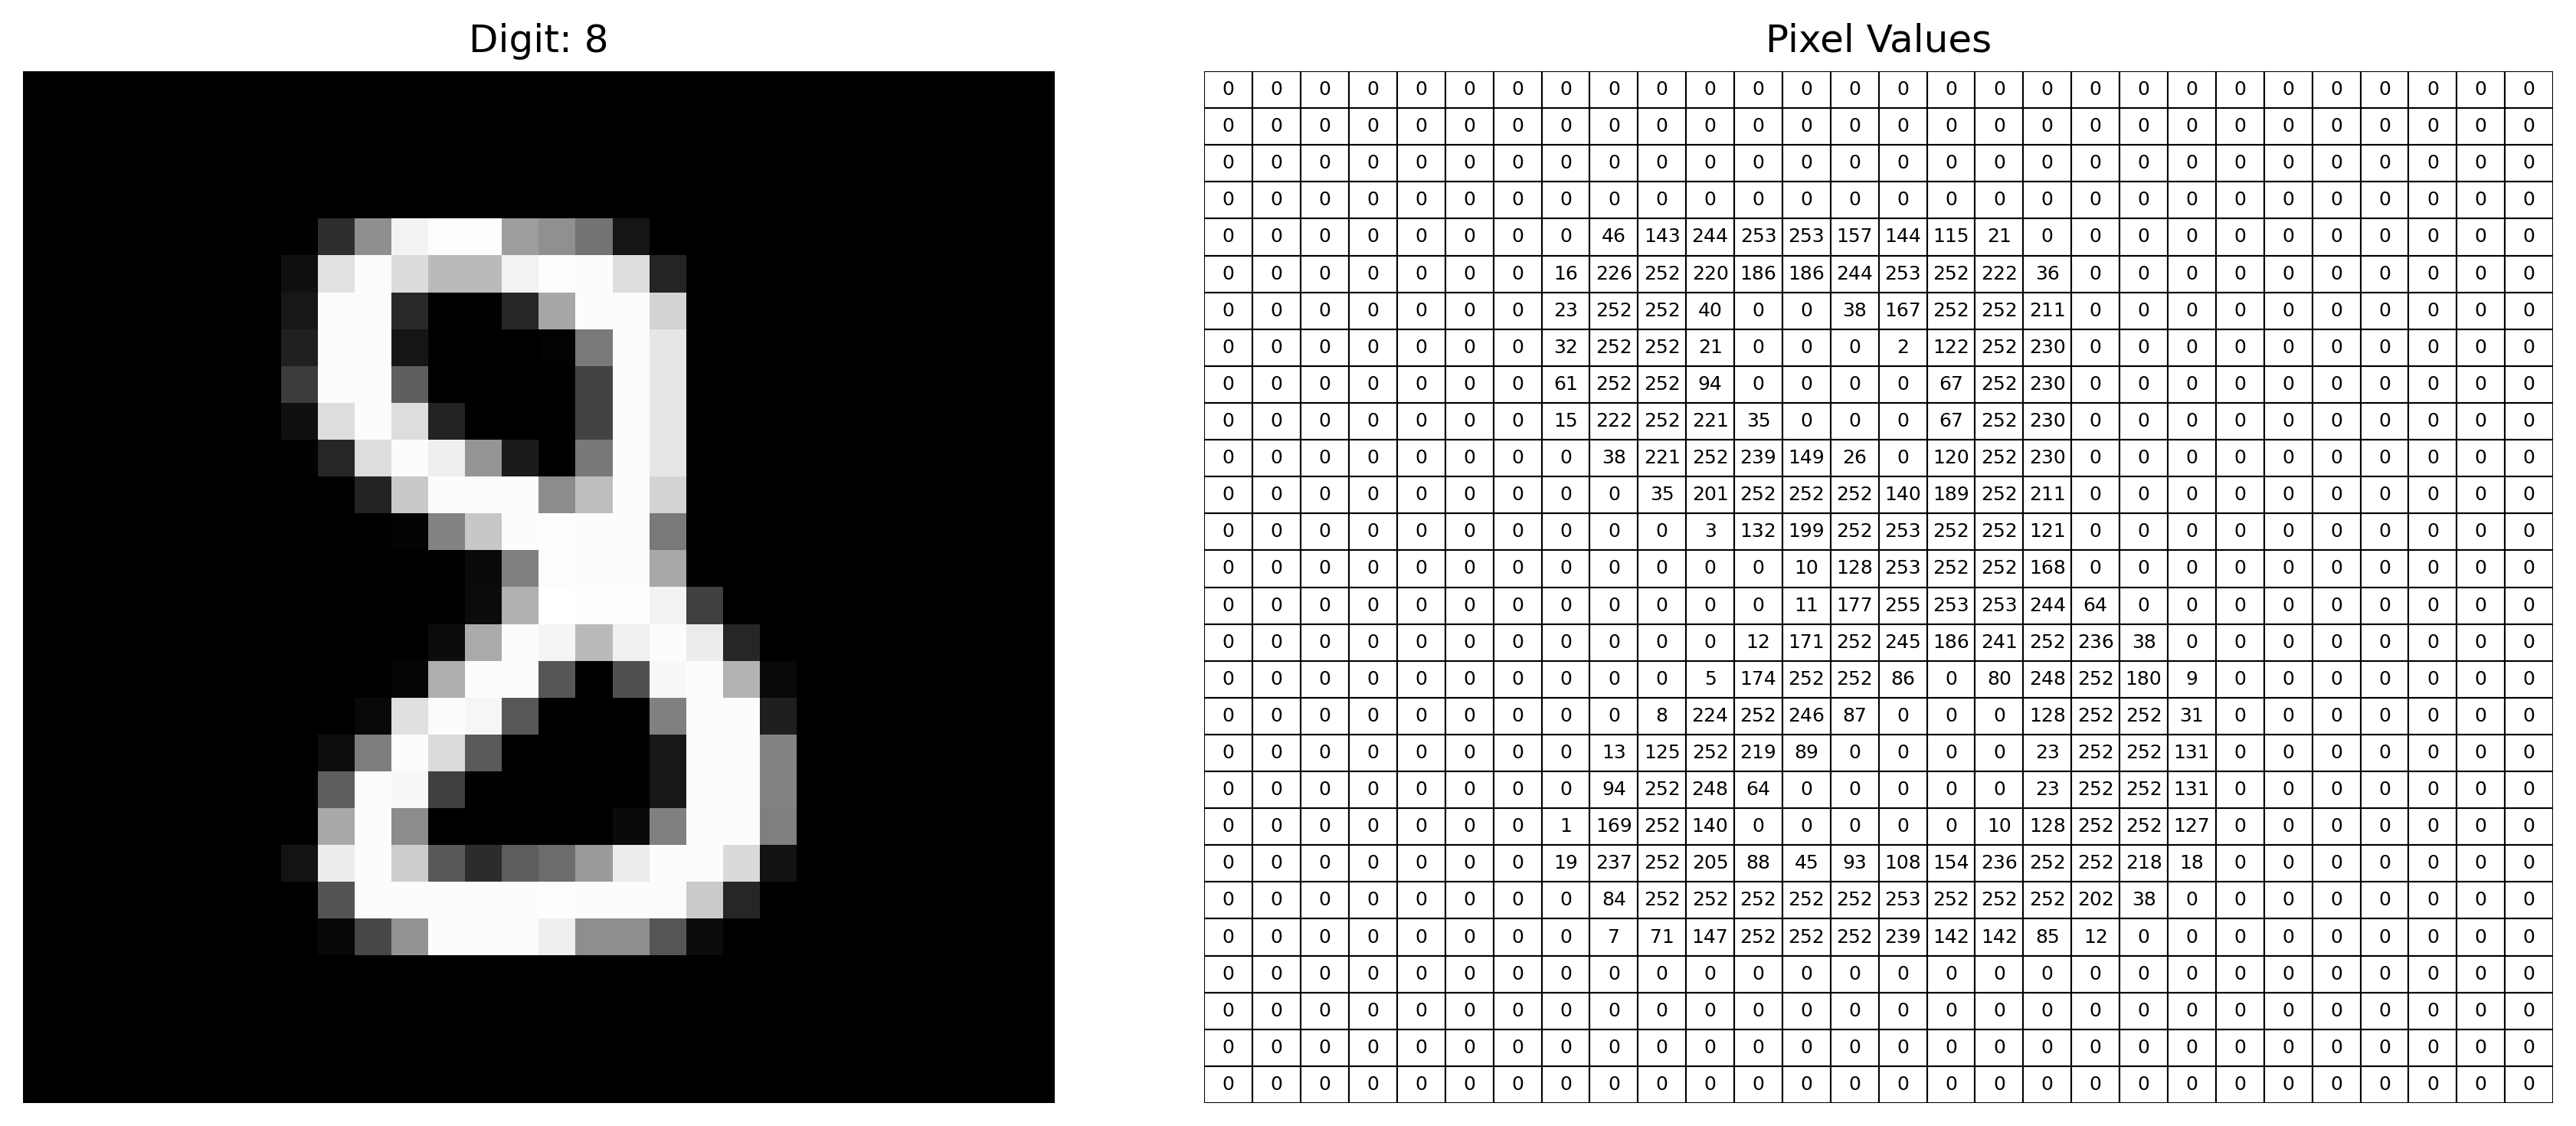

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(np.int64)  # Convert target to integer labels

# Select a random digit (you can change the index to select a different digit)
index = np.random.randint(0, X.shape[0])

# Get the image and its corresponding pixel values
image = X.iloc[index].values.reshape(28, 28)  # Reshape to 28x28 for plotting

# Create a figure with DPI set to 300
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Plot the digit image on the left
ax[0].imshow(image, cmap='gray')
ax[0].set_title(f"Digit: {y[index]}")
ax[0].axis('off')

# Set a white background for the right plot (removing imshow)
ax[1].set_title('Pixel Values')
ax[1].set_xlim(0, 28)
ax[1].set_ylim(28, 0)  # Invert y-axis for proper row order
ax[1].axis('off')  # Turn off axis

# Plot pixel values in a grid on a white background with boxes around each value
for i in range(28):
    for j in range(28):
        pixel_value = int(image[i, j])
        ax[1].text(j + 0.5, i + 0.5, pixel_value, ha='center', va='center', fontsize=6, color='black')
        # Add a rectangle (box) around each pixel value
        rect = Rectangle((j, i), 1, 1, linewidth=0.5, edgecolor='black', facecolor='none')
        ax[1].add_patch(rect)

plt.tight_layout()
plt.show()

**2.) Create a Naive Bayes model and evaluate its performance**

Use k-fold cross-validation and a Naive Bayes classifier to generate a classification report for the MNIST dataset.

In [2]:
# Step 2: Preprocess the data
# Naive Bayes typically works better with continuous data, so we scale it
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Step 3: Create a Naive Bayes classifier
model = GaussianNB()

# Step 4: K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation and get the accuracy for each fold
cross_val_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print the results
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')

# Step 5: Train the model on the entire dataset
model.fit(X_scaled, y)

# Make predictions on the training set
y_pred = model.predict(X_scaled)

# Evaluate the performance using a classification report
print("Classification Report:\n", classification_report(y, y_pred))

Cross-validation scores: [0.52578571 0.538      0.52642857 0.53957143 0.52764286]
Mean cross-validation score: 0.5314857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      6903
           1       0.85      0.94      0.89      7877
           2       0.88      0.22      0.35      6990
           3       0.71      0.27      0.39      7141
           4       0.83      0.11      0.19      6824
           5       0.51      0.03      0.05      6313
           6       0.68      0.93      0.78      6876
           7       0.92      0.24      0.38      7293
           8       0.26      0.69      0.37      6825
           9       0.37      0.95      0.53      6958

    accuracy                           0.53     70000
   macro avg       0.67      0.52      0.47     70000
weighted avg       0.68      0.53      0.48     70000



Unfortunately, Naive Bayes doesn't work particularly well for this dataset. Lets try something else, maybe an SVM.

**3.) SVMs on MNIST**

Train a linear SVM on the MNIST dataset and evaluate its performance using k-fold cross-validation.



In [3]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

# Step 1: Create an SVM classifier with a linear kernel
svm_model = make_pipeline(StandardScaler(), LinearSVC(random_state=42))

# Step 2: K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation and get the accuracy for each fold
svm_cross_val_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

# Print the results
print(f'SVM Cross-validation scores: {svm_cross_val_scores}')
print(f'SVM Mean cross-validation score: {svm_cross_val_scores.mean()}')

# Step 3: Train the SVM model on the entire dataset
svm_model.fit(X, y)

# Make predictions on the training set
svm_y_pred = svm_model.predict(X)

# Evaluate the performance using a classification report
print("SVM Classification Report:\n", classification_report(y, svm_y_pred))

KeyboardInterrupt: 

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Data preparation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/files/', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('/files/', train=False, download=True, transform=transform),
    batch_size=1000, shuffle=True)

# Initialize network and optimizer
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.5)

# Training loop
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] '
                  f'Loss: {loss.item():.6f}')

# Testing loop
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')

# Run training and testing
for epoch in range(1, 4):
    train(epoch)
    test()

ModuleNotFoundError: No module named 'torchvision'